<a href="https://colab.research.google.com/github/rsidorchuk93/Grounded-Segment-Anything/blob/main/imageGen_ecommerce.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Images generation for eCommerce

In [ ]:
# Install necessary libraries
!pip install torch torchvision transformers diffusers accelerate segment-anything pillow

In [1]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


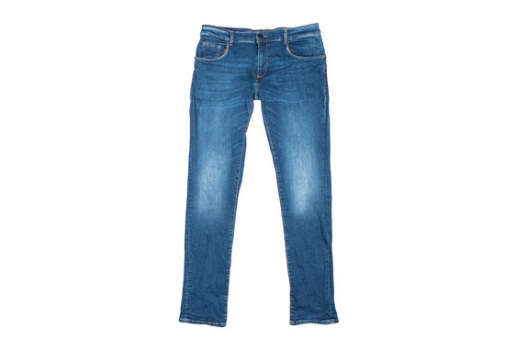

In [2]:
# Load the Image from Google Drive
from PIL import Image
import matplotlib.pyplot as plt
import cv2
import numpy as np

# Define the path to the image
image_path = '/content/drive/My Drive/test/image_generation/blue_jeans.jpg'

# Load the image
image = Image.open(image_path).convert("RGB")

# Display the image
plt.imshow(image)
plt.axis('off')
plt.show()

# Manually changing color without ML

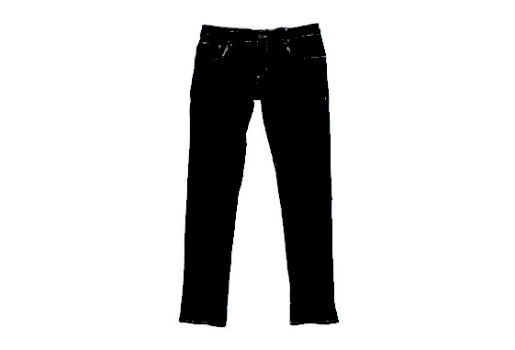

In [3]:
# Convert the image to a NumPy array
image_np = np.array(image)

# Convert the image to HSV color space for better color segmentation
image_hsv = cv2.cvtColor(image_np, cv2.COLOR_RGB2HSV)

# Define the range of blue color in HSV
lower_blue = np.array([90, 50, 50])
upper_blue = np.array([130, 255, 255])

# Create a mask to identify blue pixels
blue_mask = cv2.inRange(image_hsv, lower_blue, upper_blue)

# Change blue pixels to black in the original image
image_np[blue_mask > 0] = [0, 0, 0]

# Convert the modified NumPy array back to a PIL image
black_jeans_image = Image.fromarray(image_np)

# Step 4: Save and Display the Modified Image
# Save the modified image
black_jeans_image.save("black_jeans.png")

# Display the modified image
plt.imshow(black_jeans_image)
plt.axis('off')  # Hide the axes
plt.show()

# Use AI (diffusers) for more realistic results

In [4]:
# Connect to Hugging Face
import os
import numpy as np
hf_token = os.getenv('HF_TOKEN')

In [ ]:
import torch
from diffusers import StableDiffusionImg2ImgPipeline

# Load the model
model_id = "runwayml/stable-diffusion-v1-5"
pipe = StableDiffusionImg2ImgPipeline.from_pretrained(model_id, use_auth_token=hf_token)
pipe = pipe.to("cuda" if torch.cuda.is_available() else "cpu")

In [ ]:
# Step 1: Install necessary libraries
!pip install torch torchvision transformers diffusers accelerate

# Step 2: Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Step 3: Load the Image from Google Drive
from PIL import Image
import matplotlib.pyplot as plt
import os

# Define the path to the image
image_path = '/content/drive/My Drive/test/image_generation/blue_jeans.jpg'

# Load the image
image = Image.open(image_path).convert("RGB")

# Display the original image
plt.imshow(image)
plt.axis('off')
plt.show()

# Step 4: Use Hugging Face Diffusers for Image-to-Image Translation
from diffusers import StableDiffusionImg2ImgPipeline

# Retrieve Hugging Face Token
hf_token = os.getenv('HF_TOKEN')

# Load the pre-trained Stable Diffusion model
model_id = "runwayml/stable-diffusion-v1-5"
pipe = StableDiffusionImg2ImgPipeline.from_pretrained(model_id, use_auth_token=hf_token)
pipe = pipe.to("cuda" if torch.cuda.is_available() else "cpu")

  0%|          | 0/37 [00:00<?, ?it/s]

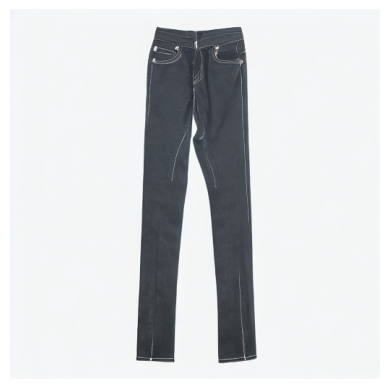

In [14]:
# Resize the image to 512x512 for the model
image = image.resize((512, 512))

# Ensure the image is a PIL image
if not isinstance(image, Image.Image):
    image = Image.fromarray(image)

# Define the prompt for the transformation
prompt = "A pair of black jeans."

# Generate the new image using the pre-trained model
result = pipe(prompt=prompt, image=image, strength=0.75)

# Extract the generated image
generated_image = result.images[0]

# Step 5: Save and Display the Modified Image
# Save the modified image
generated_image.save("black_jeans_generated.png")

# Display the modified image
plt.imshow(generated_image)
plt.axis('off')
plt.show()